In [1]:
import seaborn as sns
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,mean_squared_error


In [2]:
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings("ignore")

In [6]:
# data = pd.read_csv('crypto_data_updated_13_november.csv')

In [3]:
btc = yf.Ticker('BTC-USD')
prices1 = btc.history(period='5y')
# print(prices1)
prices1.drop(columns=['Open', 'High', 'Low', 'Dividends', 'Stock Splits'], axis = 1, inplace = True)

eth = yf.Ticker('ETH-USD')
prices2 = eth.history(period='5y')
prices2.drop(columns=['Open', 'High', 'Low', 'Dividends', 'Stock Splits'], axis = 1, inplace = True)

usdt = yf.Ticker('USDT-USD')
prices3 = usdt.history(period='5y')
prices3.drop(columns=['Open', 'High', 'Low', 'Dividends', 'Stock Splits'], axis = 1, inplace = True)

bnb = yf.Ticker('BNB-USD')
prices4 = bnb.history(period='5y')
prices4.drop(columns=['Open', 'High', 'Low', 'Dividends', 'Stock Splits'], axis = 1, inplace = True)

In [4]:
p1 = prices1.join(prices2, lsuffix = ' (BTC)', rsuffix = ' (ETH)')
# print(p1)
p2 = prices3.join(prices4, lsuffix = ' (USDT)', rsuffix = ' (BNB)')
data = p1.join(p2, lsuffix = '_', rsuffix = '_')
# print(data)
data.head()

,Close (BTC),Volume (BTC),Close (ETH),Volume (ETH),Close (USDT),Volume (USDT),Close (BNB),Volume (BNB)
Date,,,,,,,,
2018-04-26 00:00:00+00:00,9281.509766,8970559488,662.809021,2984009984,0.999614,4206320128,14.6536,127788000
2018-04-27 00:00:00+00:00,8987.049805,7566289920,647.031982,2598129920,1.004150,4060179968,14.3291,101995000
2018-04-28 00:00:00+00:00,9348.480469,7805479936,683.677979,2496659968,0.999335,4066050048,15.2001,122360000
2018-04-29 00:00:00+00:00,9419.080078,8853000192,688.880981,2740559872,0.998016,5167799808,15.0562,105495000
2018-04-30 00:00:00+00:00,9240.549805,8673920000,669.924011,2853100032,0.998919,4498440192,14.3121,83765800


In [5]:
data.tail()

,Close (BTC),Volume (BTC),Close (ETH),Volume (ETH),Close (USDT),Volume (USDT),Close (BNB),Volume (BNB)
Date,,,,,,,,
2023-04-22 00:00:00+00:00,27817.500000,13125734602,1874.228638,6970642726,1.000185,20337083601,331.995087,670641138
2023-04-23 00:00:00+00:00,27591.384766,12785446832,1862.062012,6607451862,1.000023,19881820238,330.618835,639990072
2023-04-24 00:00:00+00:00,27525.339844,17703288330,1842.757446,8438191338,1.000121,25519663344,331.245880,662758378
2023-04-25 00:00:00+00:00,28307.597656,17733373139,1866.753662,8677255481,1.000159,25931247322,338.325562,682400159
2023-04-26 00:00:00+00:00,29710.988281,25906774016,1947.405029,11376974848,1.000039,34520215552,341.930145,810660736


In [6]:
data.shape

(1827, 8)

In [7]:
original = data.iloc[-1, :]
data = data.iloc[:-1,:]
data

,Close (BTC),Volume (BTC),Close (ETH),Volume (ETH),Close (USDT),Volume (USDT),Close (BNB),Volume (BNB)
Date,,,,,,,,
2018-04-26 00:00:00+00:00,9281.509766,8970559488,662.809021,2984009984,0.999614,4206320128,14.653600,127788000
2018-04-27 00:00:00+00:00,8987.049805,7566289920,647.031982,2598129920,1.004150,4060179968,14.329100,101995000
2018-04-28 00:00:00+00:00,9348.480469,7805479936,683.677979,2496659968,0.999335,4066050048,15.200100,122360000
2018-04-29 00:00:00+00:00,9419.080078,8853000192,688.880981,2740559872,0.998016,5167799808,15.056200,105495000
2018-04-30 00:00:00+00:00,9240.549805,8673920000,669.924011,2853100032,0.998919,4498440192,14.312100,83765800
...,...,...,...,...,...,...,...,...
2023-04-21 00:00:00+00:00,27276.910156,20759504330,1849.999878,12044274581,1.000142,34553496031,321.674988,1057530805
2023-04-22 00:00:00+00:00,27817.500000,13125734602,1874.228638,6970642726,1.000185,20337083601,331.995087,670641138
2023-04-23 00:00:00+00:00,27591.384766,12785446832,1862.062012,6607451862,1.000023,19881820238,330.618835,639990072


In [8]:
data.info()
data.isna().sum()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1826 entries, 2018-04-26 00:00:00+00:00 to 2023-04-25 00:00:00+00:00
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Close (BTC)    1826 non-null   float64
 1   Volume (BTC)   1826 non-null   int64  
 2   Close (ETH)    1826 non-null   float64
 3   Volume (ETH)   1826 non-null   int64  
 4   Close (USDT)   1826 non-null   float64
 5   Volume (USDT)  1826 non-null   int64  
 6   Close (BNB)    1826 non-null   float64
 7   Volume (BNB)   1826 non-null   int64  
dtypes: float64(4), int64(4)
memory usage: 128.4 KB


Close (BTC)      0
Volume (BTC)     0
Close (ETH)      0
Volume (ETH)     0
Close (USDT)     0
Volume (USDT)    0
Close (BNB)      0
Volume (BNB)     0
dtype: int64

In [9]:
# data.dropna(inplace=True)


VISUAL ANALYSIS

<Axes: xlabel='Date'>

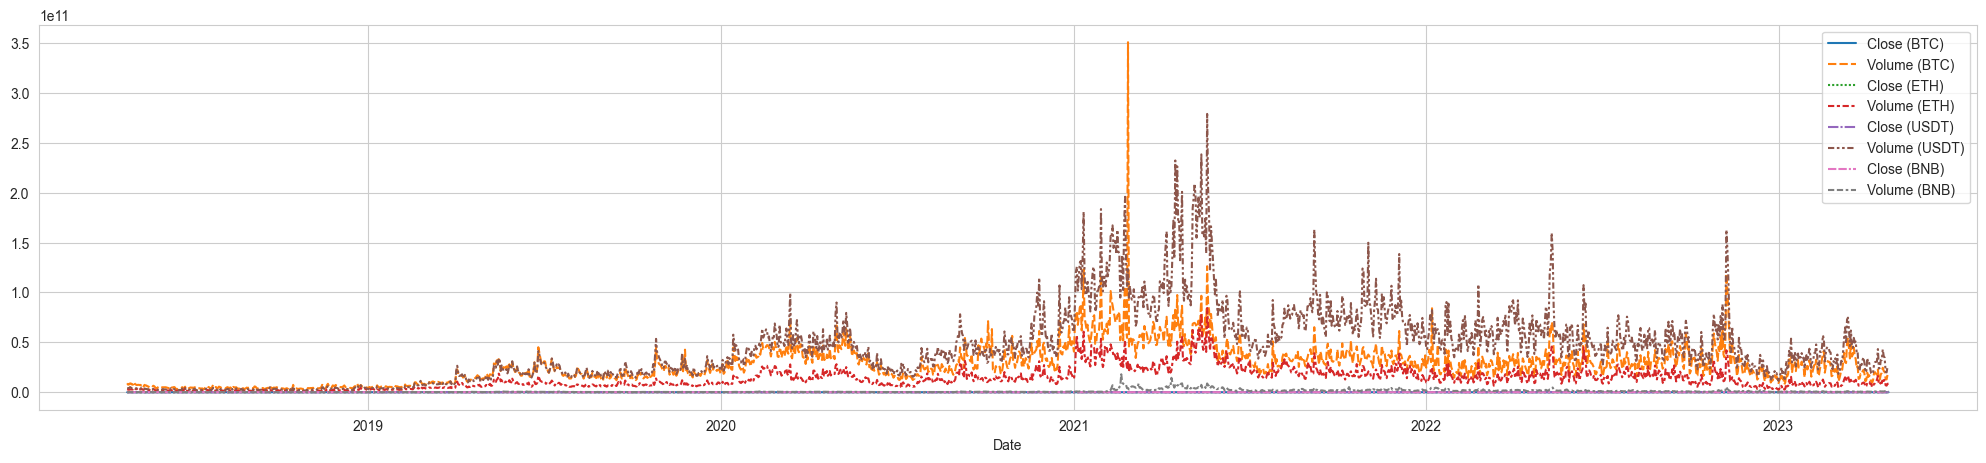

In [10]:
plt.figure(figsize = (25, 5))
sns.set_style('whitegrid')
sns.lineplot(data=data)

Text(0.5, 1.0, 'Adjacent Close Price')

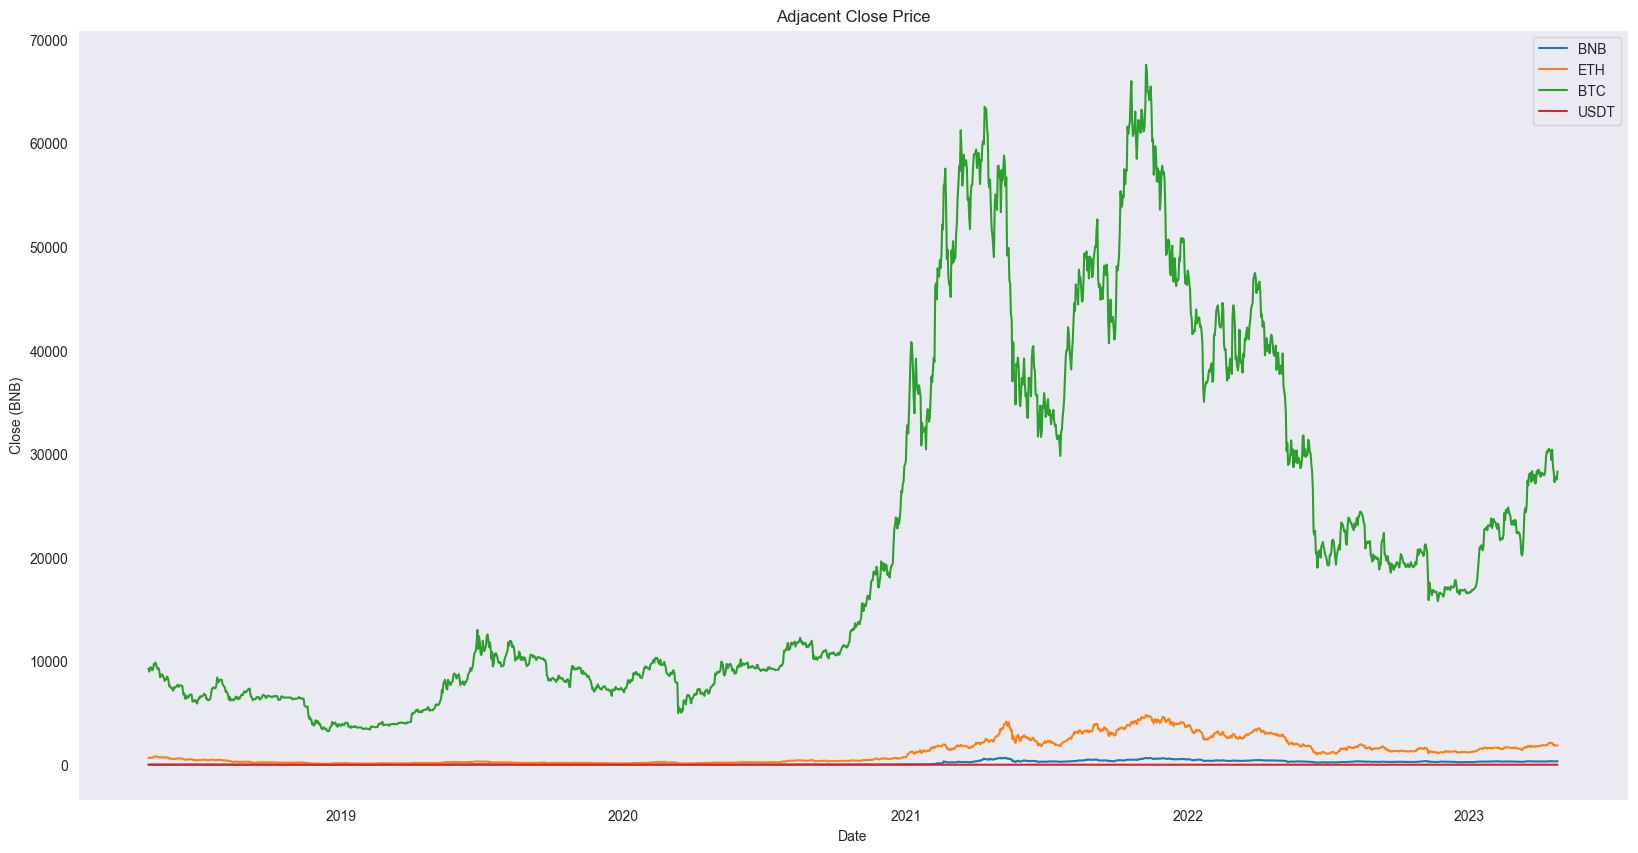

In [13]:
plt.figure(figsize = (20, 10))
sns.set_style('dark')
sns.lineplot(data = data['Close (BNB)'], label = 'BNB')
sns.lineplot(data = data['Close (ETH)'], label = 'ETH')
sns.lineplot(data = data['Close (BTC)'], label = 'BTC')
sns.lineplot(data = data['Close (USDT)'], label = 'USDT')
plt.title('Adjacent Close Price')

In [14]:
import plotly.graph_objects as go
from datetime import datetime


data_btc = data.loc[:,'Close (BTC)'].values
data_btc
temp = yf.Ticker('BTC-USD')
data_btc = btc.history(period='5y')

fig = go.Figure(data=[go.Candlestick(x=data_btc.index,
                open=data_btc['Open'],
                high=data_btc['High'],
                low=data_btc['Low'],
                close=data_btc['Close'])])

fig.show()

array([[<Axes: title={'center': 'Close (BTC)'}>,
        <Axes: title={'center': 'Volume (BTC)'}>,
        <Axes: title={'center': 'Close (ETH)'}>,
        <Axes: title={'center': 'Volume (ETH)'}>],
       [<Axes: title={'center': 'Close (USDT)'}>,
        <Axes: title={'center': 'Volume (USDT)'}>,
        <Axes: title={'center': 'Close (BNB)'}>,
        <Axes: title={'center': 'Volume (BNB)'}>]], dtype=object)

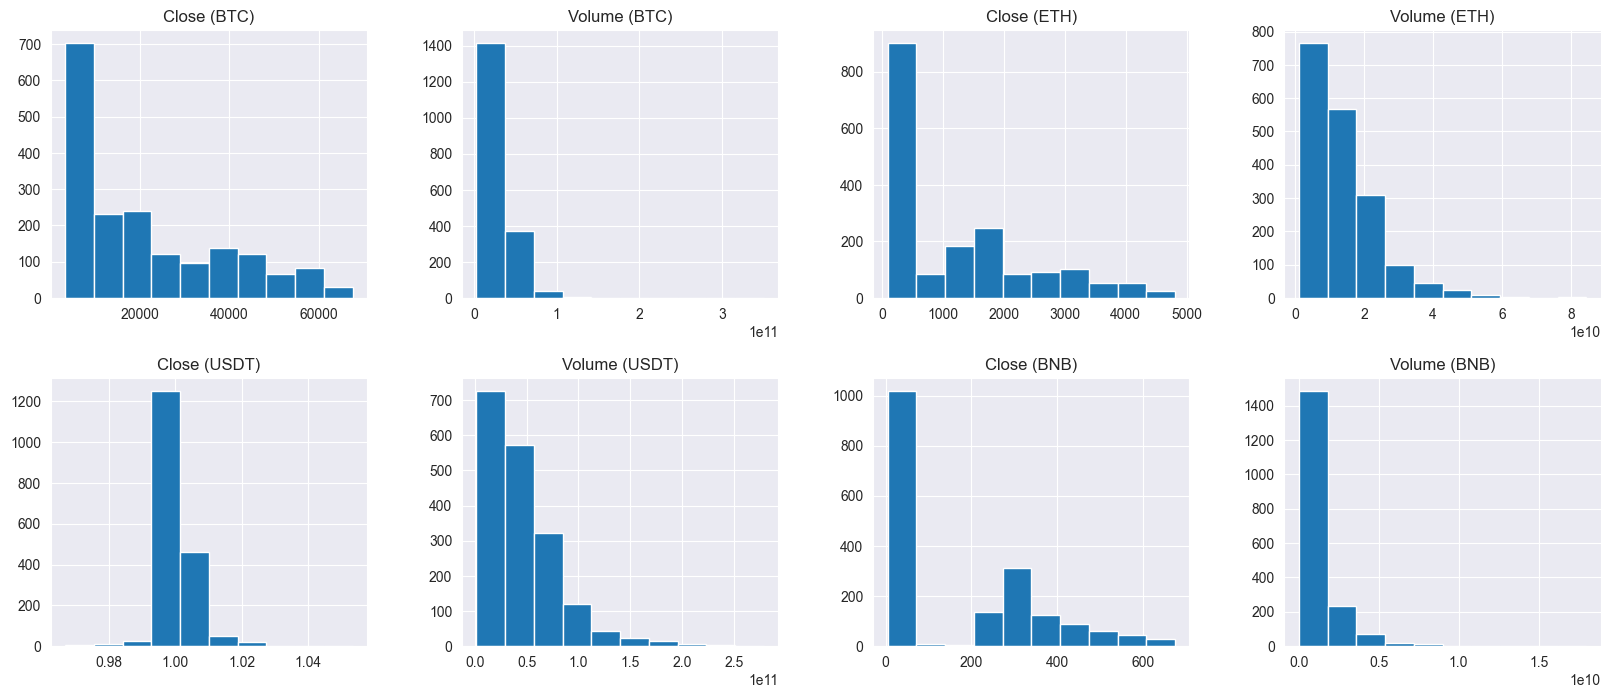

In [18]:
data.hist(figsize=(20, 8), layout=(2, 4))

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>]], dtype=object)

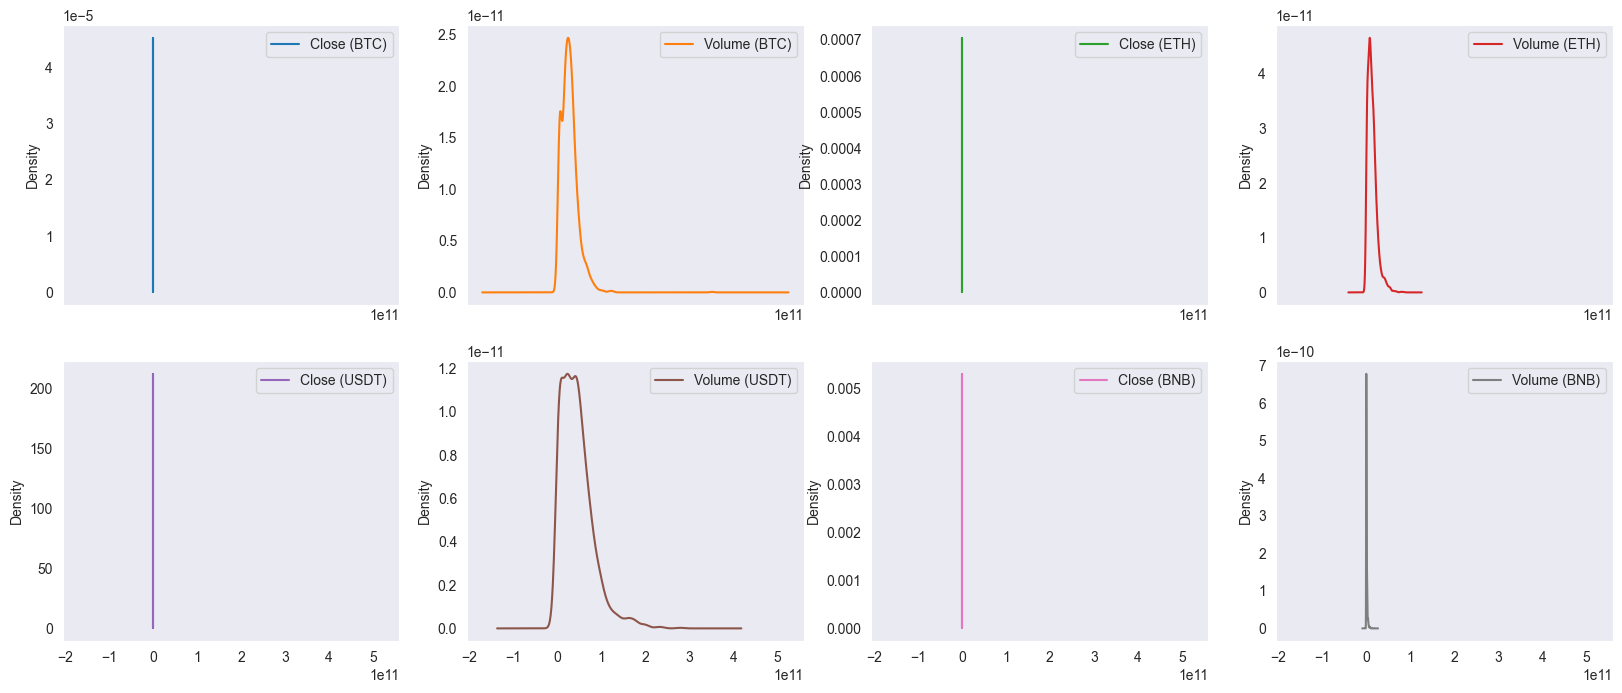

In [100]:
data.plot(kind = "kde", subplots = True, layout = (2, 4), figsize = (20, 8))

checking for correlation

In [15]:
data.corr()

,Close (BTC),Volume (BTC),Close (ETH),Volume (ETH),Close (USDT),Volume (USDT),Close (BNB),Volume (BNB)
Close (BTC),1.000000,0.528381,0.924625,0.638578,-0.167961,0.751049,0.880851,0.749029
Volume (BTC),0.528381,1.000000,0.353336,0.841754,-0.089714,0.860027,0.345617,0.579787
Close (ETH),0.924625,0.353336,1.000000,0.512711,-0.168060,0.611059,0.955475,0.631802
Volume (ETH),0.638578,0.841754,0.512711,1.000000,-0.093131,0.940691,0.478519,0.685074
Close (USDT),-0.167961,-0.089714,-0.168060,-0.093131,1.000000,-0.113364,-0.168279,-0.105156
Volume (USDT),0.751049,0.860027,0.611059,0.940691,-0.113364,1.000000,0.586880,0.765335
Close (BNB),0.880851,0.345617,0.955475,0.478519,-0.168279,0.586880,1.000000,0.668867
Volume (BNB),0.749029,0.579787,0.631802,0.685074,-0.105156,0.765335,0.668867,1.000000


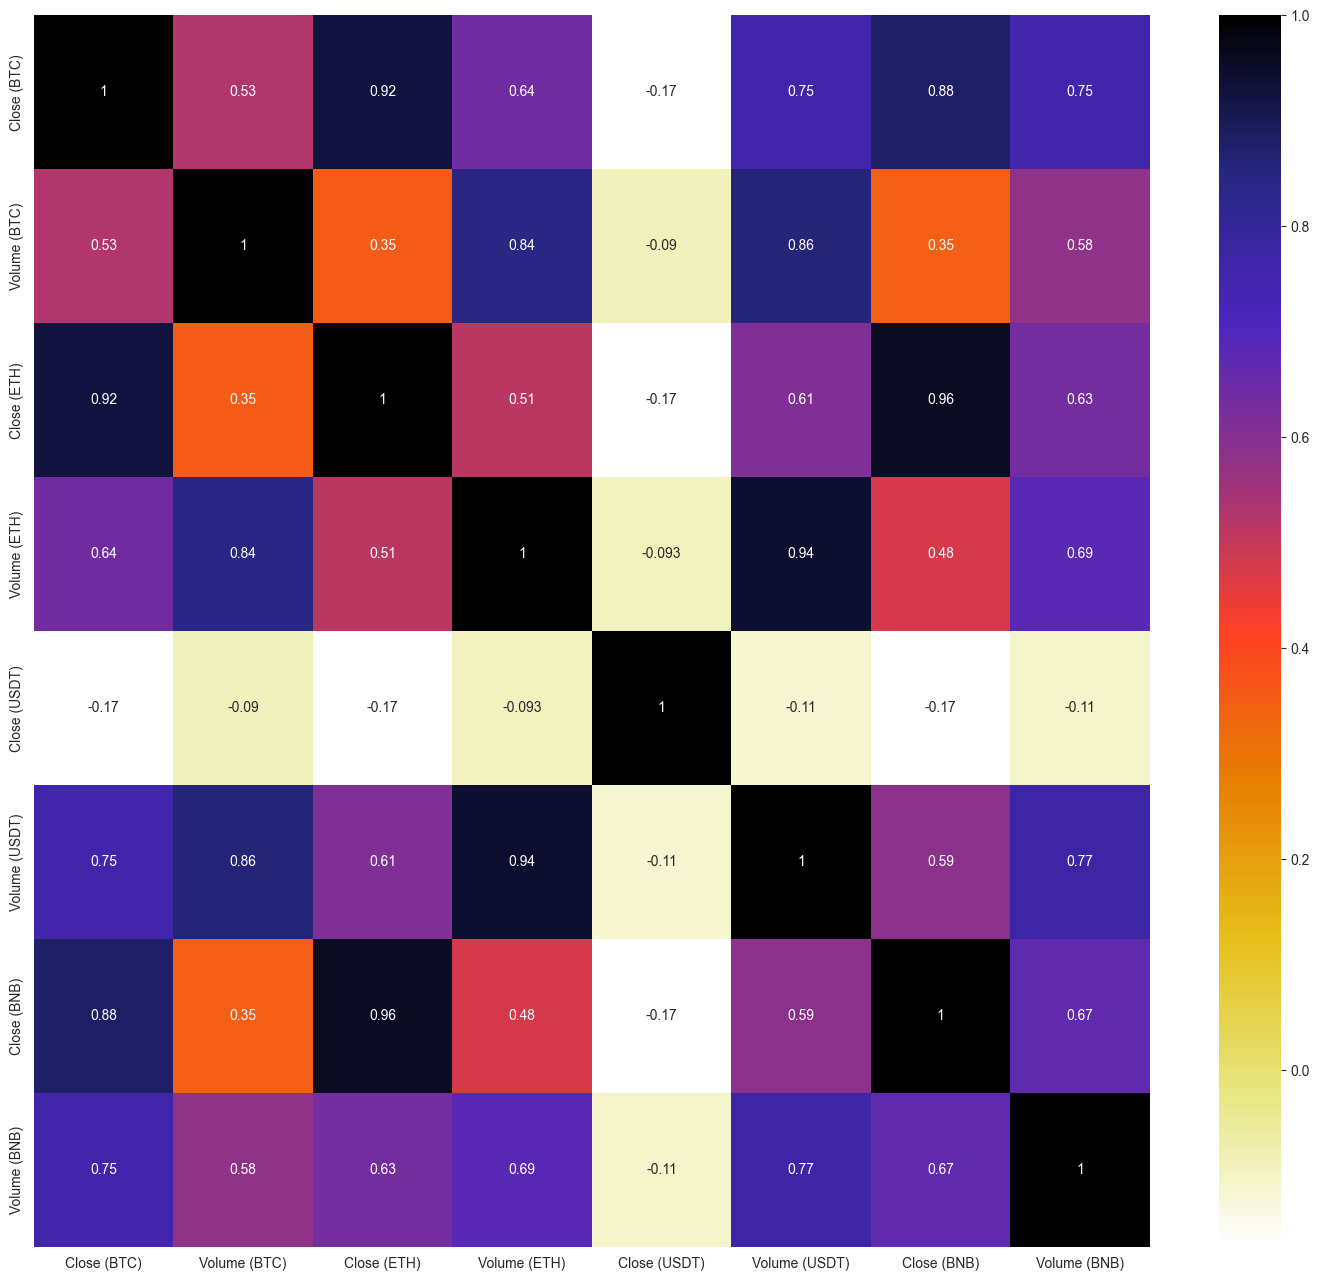

In [16]:
plt.figure(figsize=(18,16))
sns.heatmap(data.corr(), annot=True, cmap=plt.cm.CMRmap_r);

data Pre-processing

In [66]:
X = data.drop(columns = ['Close (BTC)'], axis = 1)
Y = data.loc[:, 'Close (BTC)']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=2)


In [18]:
from sklearn.feature_selection import SelectKBest

fs = SelectKBest(k=4)
X_train = fs.fit_transform(X_train, Y_train)
X_test = fs.transform(X_test)



In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor

In [21]:
neigh = KNeighborsRegressor(n_neighbors=2)
neigh.fit(X_train, Y_train)


rf = RandomForestRegressor()
rf.fit(X_train,Y_train)

dt = tree.DecisionTreeRegressor()
dt.fit(X_train, Y_train)

est = GradientBoostingRegressor()
est.fit(X_train, Y_train)

GradientBoostingRegressor()

In [22]:
Y_pred_neigh = neigh.predict(X_test)
r2neigh = metrics.r2_score(Y_test, Y_pred_neigh)

Y_pred_rf = rf.predict(X_test)
r2rf = metrics.r2_score(Y_test, Y_pred_rf)

Y_pred_dt = dt.predict(X_test)
r2dt = metrics.r2_score(Y_test, Y_pred_dt)

Y_pred_est = est.predict(X_test)
r2est = metrics.r2_score(Y_test, Y_pred_est)



In [23]:
print("*"*10, "Accuracy", "*"*10)

print("-"*30)
print("K nearest neighbors: ", r2neigh)
print("-"*30)


print("-"*30)
print("random forest: ", r2rf)
print("-"*30)


print("-"*30)
print("decision tree: ", r2dt)
print("-"*30)


print("-"*30)
print("gradient boosting: ", r2est)
print("-"*30)

********** Accuracy **********
------------------------------
K nearest neighbors:  0.9733850268380865
------------------------------
------------------------------
random forest:  0.9788462429657362
------------------------------
------------------------------
decision tree:  0.9586488027034419
------------------------------
------------------------------
gradient boosting:  0.9683047105912803
------------------------------


Hyperparameter Tuning

In [24]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 1000, num = 100)]
max_features = ['auto', 'sqrt', 'log2']
max_depth = [int(x) for x in np.linspace(10, 200, num = 20)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510, 520, 530, 540, 550, 560, 570, 580, 590, 600, 610, 620, 630, 640, 650, 660, 670, 680, 690, 700, 710, 720, 730, 740, 750, 760, 770, 780, 790, 800, 810, 820, 830, 840, 850, 860, 870, 880, 890, 900, 910, 920, 930, 940, 950, 960, 970, 980, 990, 1000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [25]:
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 200, cv = 3, verbose=0, random_state=42, n_jobs = -1)
rf_random.fit(X_train, Y_train)



rf_random.best_params_



{'n_estimators': 480,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 70,
 'bootstrap': True}

In [26]:
rf = RandomForestRegressor(**rf_random.best_params_)
rf.fit(X_train, Y_train)

Y_pred_rf = rf.predict(X_test)
r2rf = metrics.r2_score(Y_test, Y_pred_rf)

print("-"*30)
print("Accuracy: ", r2rf)
print("-"*30)

------------------------------
Accuracy:  0.978776189107493
------------------------------


In [72]:
# d = Y_test['Close (BTC)']

np.sqrt(mean_squared_error(Y_test,Y_pred_rf))
# plt.plot(Y_test,Y_pred_rf)
# Y_pred_rf

2386.578867467967

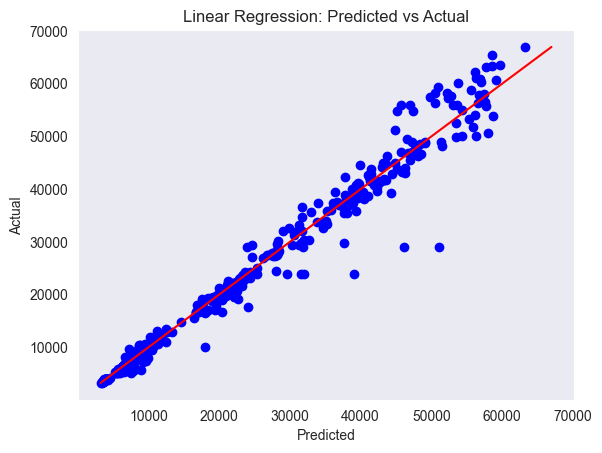

In [85]:
# Plotting the errors
plt.scatter(Y_pred_rf, Y_test, color='blue')
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Linear Regression: Predicted vs Actual")
plt.show()

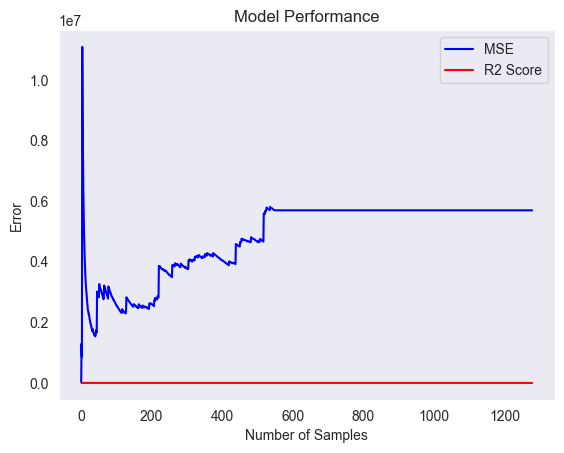

In [88]:
from sklearn.metrics import r2_score

mse_values = []
r2_values = []

for i in range(1, len(X_train) + 1):
    partial_y_pred = Y_pred_rf[:i]
    partial_y_test = Y_test[:i]
    mse_values.append(mean_squared_error(partial_y_test, partial_y_pred))
    r2_values.append(r2_score(partial_y_test, partial_y_pred))

# Plotting the MSE and R2 score
plt.plot(range(1, len(X_train) + 1), mse_values,  linestyle='-', color='blue', label='MSE')
plt.plot(range(1, len(X_train) + 1), r2_values,  linestyle='-', color='red', label='R2 Score')
plt.xlabel("Number of Samples")
plt.ylabel("Error")
plt.title("Model Performance")
plt.legend()
plt.show()

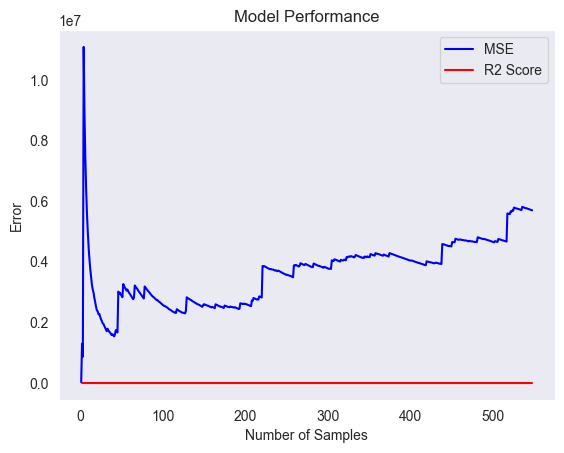

In [99]:
mse_values = []
r2_values = []

for i in range(1, len(X_test) + 1):
    partial_y_pred = Y_pred_rf[:i]
    partial_y_test = Y_test[:i]
    mse_values.append(mean_squared_error(partial_y_test, partial_y_pred))
    r2_values.append(r2_score(partial_y_test, partial_y_pred))

# Plotting the MSE and R2 score
plt.plot(range(1, len(X_test) + 1), mse_values,  linestyle='-', color='blue', label='MSE')
plt.plot(range(1, len(X_test) + 1), r2_values,  linestyle='-', color='red', label='R2 Score')
plt.xlabel("Number of Samples")
plt.ylabel("Error")
plt.title("Model Performance")
plt.legend()
plt.show()

In [98]:


# Custom datapoints for prediction
custom_data = {
    'Volume (BTC)': [25897471231],  
    'Close (ETH)': [1946.7],  
    'Volume (ETH)': [13072391816],  
    'Close (USDT)': [1],  
    'Volume (USDT)': [33925507768], 
    'Close (BNB)': [341.08],  
    'Volume (BNB)': [950589121], 
}
						
# Create a DataFrame from the custom data
custom_df = pd.DataFrame(custom_data)
df = scaler.transform(fs.transform(custom_df))
res = rf.predict(df)
print(res)


[28614.99433187]
